In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Combinations

### The file *iris_data.txt* contains 150 observations of the length and width of the sepals of Iris flowers. These data are real and were obtained from the [UCI repository](http://archive.ics.uci.edu/ml/datasets/iris).


### a) We plot the 150 observaciones and comment about the distribution of the data

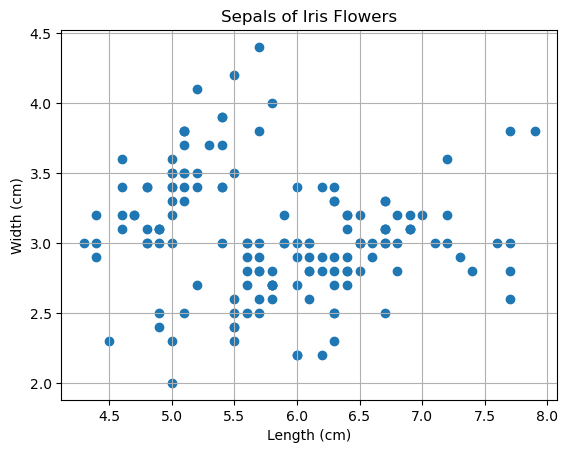

In [46]:
# Export data to .txt
filename = 'iris_data.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=0, dtype=str)

# Create an array to store the data numerically
numeric_data = np.zeros((len(data), 2))

# Fill the numerical array with numeric data
for i in range(len(data)):
    for j in range(0, 2):
        numeric_data[i][j] = float(data[i][j])

# Plot all the data
plt.scatter(numeric_data[:,0], numeric_data[:,1])
plt.grid()
plt.title('Sepals of Iris Flowers')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.show()


It can be noted that most of the observations of the length and width of the sepals are distributed around a length between 5.5 cm and 7 cm for a width between 2 cm and 3.5 cm. On the other hand, a small concentration of data can also be noted for lengths between 4 cm and 6 cm and a width between 3 cm and 4.5 cm.


### b) Implementation of EM algorithm

We estimate the density function that generates these 2-dimensional data as a combination of **three** Gaussian density functions. That is,

$$ p(x) = \sum_{k=1}^{3} \alpha_k N(x; \mu_k, Q_k)$$

We plot the points in the file, and overlay the contour of the combined density function p(x) (NOT the contour of each individual base density function separately) for several iterations of the algorithm.

In [47]:
def gauss(x, mu, Cx):
    n = np.shape(Cx)[0]
    return (1/(np.sqrt((2*np.pi)**(n)*(np.linalg.det(Cx)))))*np.exp((-1/2)*(np.transpose(x-mu)@np.linalg.inv(Cx))@(x-mu))[0]

# Function to create a new list of thetas, depending on the number of functions n to be combined.
def create_thetas(n):
    thetas = [[] for _ in range(n)]
    return thetas


In [48]:
# Inputs
# maxIt: maximum iterations allowed for the algorithm
# k: number of functions to be combined to create the composite density function.
# thetak: list of thetak parameters, each element of the list is a list containing a mean and a covariance matrix.
# alphak: list of alphak parameters, each element of the list is an alpha value.
# numeric_data: array of data on which the composite density function is to be found.

# Outputs
# thetak_final: array of parameters of the combined functions forming the composite function that best fits the data.
# p: function composed of different combinations of Gaussians
def EM(maxIt, tol, thetak0, alphak, data):
    c = 0 # Counter for the while loop
    k = len(thetak0) # Number of Gaussian functions to be combined.
    m = len(data) # Amount of data
    Y = np.zeros((m, len(thetak0))) # Gamma matrix: each column corresponds to each gamma_k
    norm = 100
    regu = 0.01*np.eye(2)

    while(c < maxIt and norm > tol):
        
        # E-Step
        den = 0
        for r in range(len(thetak0)):
            Nm = np.zeros((m, 1))
            for i in range(m):
                Nm[i] = gauss(np.array(np.matrix(numeric_data[i])).T, thetak0[r][0], thetak0[r][1] + regu)
            den = den + alphak[r]*Nm

        num = 0
        for r in range(len(thetak0)):
            Nm = np.zeros((m, 1))
            for i in range(m):
                Nm[i] = gauss(np.array(np.matrix(numeric_data[i])).T, thetak0[r][0], thetak0[r][1] + regu)
            num = alphak[r]*Nm
            Y[:,r] = np.array(np.matrix(np.divide(num, den))).T

        # M-Step

        # In this loop, Nk is calculated.
        Nk = []
        sum = 0
        for j in range(len(thetak0)):
            sum = 0
            for i in range(m):
                sum = sum + Y[:,j][i]
            Nk.append(sum)

        # In this loop, alphak is calculated.
        alphak = []
        for i in range(len(thetak0)):
            alphak.append(Nk[i]/m)

        # In this loop, the new means (muk) are calculated.
        muk = []
        sum = 0
        for j in range(len(thetak0)):
            sum = 0
            for i in range(m):
                sum = sum + Y[:,j][i]*np.array(np.matrix(numeric_data[i])).T
            muk.append(sum/Nk[j])

        # In this loop, the new covariance matrices (Ck) are calculated.
        Ck = []
        sum = 0
        for j in range(len(thetak0)):
            sum = 0
            for i in range(m):
                datum = np.array(np.matrix(numeric_data[i])).T
                sum = sum + Y[:,j][i]*(datum-muk[j])@(datum-muk[j]).T
            Ck.append(sum/Nk[j])
    

        # A new list of thetas is created, to then save those found in the current iteration.
        thetak_new = create_thetas(len(thetak0))
        for i in range(len(thetak0)):
            thetak_new[i].append(muk[i])
            thetak_new[i].append(Ck[i])

        norm = np.linalg.norm(thetak_new[0][0] - thetak0[0][0])
        # The "new" value of thetak will now be used in the next iteration 
        thetak0 = thetak_new
        c += 1

    # # When reaching the maximum number of iterations
    thetak_final = thetak0

    return thetak_final, c


In [49]:
# Initial conditions
mu1 = np.array([[5], [5]])
mu2 = np.array([[2], [3]])
mu3 = np.array([[5.21], [8]])

C1 = np.array([[1, 0], [0, 1]])
C2 = np.array([[1, 0], [0, 1]])
C3 = np.array([[1, 0], [0, 1]])
thetak = []
theta1 = [mu1, C1]
theta2 = [mu2, C2]
theta3 = [mu3, C3]

thetak.append(theta1)
thetak.append(theta2)
thetak.append(theta3)

alphak = []
alpha1 = 1/3
alpha2 = 1/3
alpha3 = 1/3

alphak.append(alpha1)
alphak.append(alpha2)
alphak.append(alpha3)

maxIts = 1000
tol = 10**-4

params, its = EM(maxIts, tol, thetak, alphak, data)
print(f'its: {its}')


its: 20


first: [array([[6.23565966],
       [2.86894099]]), array([[0.46961674, 0.12567873],
       [0.12567873, 0.11175816]])]

second: [array([[4.97626903],
       [3.39224469]]), array([[0.10261305, 0.06549936],
       [0.06549936, 0.08924565]])]

third: [array([[5.54283039],
       [4.1059738 ]]), array([[0.04278317, 0.01703581],
       [0.01703581, 0.05240719]])]


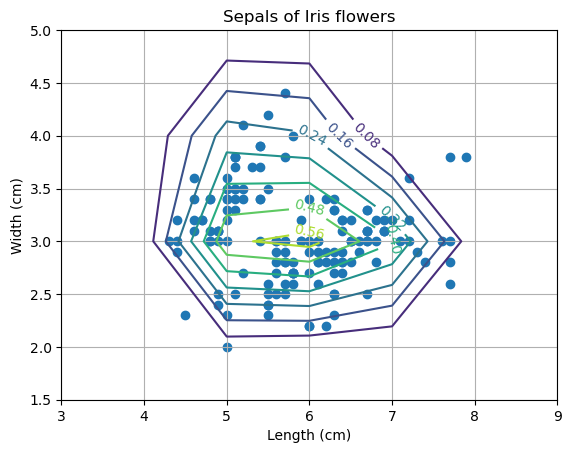

In [50]:
print(f'first: {params[0]}\n')
print(f'second: {params[1]}\n')
print(f'third: {params[2]}')

XPoints = []
YPoints = []

range_vals = range(-10, 10, 1)

for val in range_vals:
    XPoints.append(val)
    YPoints.append(val)

# Z values as a matrix
ZPoints = np.ndarray((len(range_vals), len(range_vals)))

# Necessary only for plotting in 3D
X, Y = np.meshgrid(XPoints, YPoints)

regu = 0.01*np.eye(2)

# Calculate the value corresponding to each pair of x, y coordinates
for x in range(len(XPoints)):
    for y in range(len(YPoints)):
        v = np.array([[YPoints[y]], [XPoints[x]]])
        f = gauss(v, params[0][0], params[0][1] + regu) + gauss(v, params[1][0], params[1][1] + regu) + gauss(v, params[2][0], params[2][1] + regu)
        ZPoints[x][y] = f

# Set the x axis and y axis limits
pylab.xlim([3, 9])
pylab.ylim([1.5, 5])
contours = plt.contour(XPoints, YPoints, ZPoints)
plt.clabel(contours, inline=1, fontsize=10)
plt.grid()
plt.scatter(numeric_data[:, 0], numeric_data[:, 1])
plt.title('Sepals of Iris flowers')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')

plt.show()

def plotter(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
    ax.plot_surface(X, Y, ZPoints, cmap=cm.coolwarm)
    ax.view_init(elev=E, azim=A)
    plt.show()

# from ipywidgets import interactive
# iplot = interactive(plotter,
#                     E=(-90, 90, 5),
#                     A=(-90, 90, 5)
#                     )
# iplot


### c) We repeat the process, but now for a combination of **four** Gaussians.

In [52]:
# Initial concitions
mu1 = np.array([[5], [5]])
mu2 = np.array([[2], [3]])
mu3 = np.array([[5.21], [8]])
mu4 = np.array([[1], [8]])

C1 = np.array([[1, 0], [0, 1]])
C2 = np.array([[1, 0], [0, 1]])
C3 = np.array([[1, 0], [0, 1]])
C4 = np.array([[1, 0], [0, 1]])

thetak2 = []
theta1 = [mu1, C1]
theta2 = [mu2, C2]
theta3 = [mu3, C3]
theta4 = [mu4, C4]

thetak2.append(theta1)
thetak2.append(theta2)
thetak2.append(theta3)
thetak2.append(theta4)

alphak2 = []
alpha1 = 1/4
alpha2 = 1/4
alpha3 = 1/4
alpha4 = 1/4

alphak2.append(alpha1)
alphak2.append(alpha2)
alphak2.append(alpha3)
alphak2.append(alpha4)

maxIts2 = 500
tol2 = 10**-4

params2, its2 = EM(maxIts2, tol2, thetak2, alphak2, numeric_data)
print(f'its: {its2}')

its: 20


first: [array([[6.23565896],
       [2.86894051]]), array([[0.46961777, 0.12567942],
       [0.12567942, 0.11175828]])]

second: [array([[4.9762001 ],
       [3.39216237]]), array([[0.10259362, 0.06547393],
       [0.06547393, 0.08920995]])]

third: [array([[5.54287695],
       [4.10599474]]), array([[0.04277565, 0.0170429 ],
       [0.0170429 , 0.05242171]])]

fourth: [array([[5.45465516],
       [3.99337787]]), array([[0.05567634, 0.02416708],
       [0.02416708, 0.0623825 ]])]


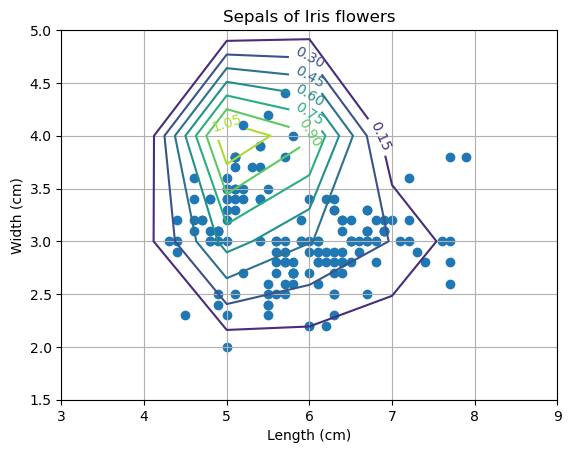

In [53]:
print(f'first: {params2[0]}\n')
print(f'second: {params2[1]}\n')
print(f'third: {params2[2]}\n')
print(f'fourth: {params2[3]}')

XPoints = []
YPoints = []

range_vals = range(-10, 10, 1)

for val in range_vals:
    XPoints.append(val)
    YPoints.append(val)

# Z values as a matrix
ZPoints = np.ndarray((len(range_vals), len(range_vals)))

# Necessary only for plotting in 3D
X, Y = np.meshgrid(XPoints, YPoints)

regu = 0.1*np.eye(2)

# Calculate the value corresponding to each pair of x, y coordinates
for x in range(len(XPoints)):
    for y in range(len(YPoints)):
        v = np.array([[YPoints[y]], [XPoints[x]]])
        f = gauss(v, params2[0][0], params2[0][1] + regu) + gauss(v, params2[1][0], params[1][1] + regu) + gauss(v, params2[2][0], params2[2][1] + regu) + gauss(v, params2[3][0], params2[3][1] + regu)
        ZPoints[x][y] = f

# Set the x axis and y axis limits
pylab.xlim([3, 9])
pylab.ylim([1.5, 5])
contours = plt.contour(XPoints, YPoints, ZPoints)
plt.clabel(contours, inline=1, fontsize=10)
plt.grid()
plt.scatter(numeric_data[:,0], numeric_data[:,1])
plt.title('Sepals of Iris flowers')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')

plt.show()

def plotter(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.gca(projection='3d') # Set up the 3d axis as a 3D plot
    ax.plot_surface(X, Y, ZPoints, cmap=cm.coolwarm)
    ax.view_init(elev=E, azim=A)
    plt.show()

# from ipywidgets import interactive
# iplot = interactive(plotter,
#                     E=(-90, 90, 5),
#                     A=(-90, 90, 5)
#                     )
# iplot


In [54]:
from scipy.stats import multivariate_normal

var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
print(var.pdf([1,0]))

x = np.array([[1],[0]])
mean = np.array([[0],[0]])
cov = np.array([[1,0],[0,1]])

var2 = gauss(x, mean, cov)
print(float(var2))

0.09653235263005393
0.09653235263005391
